<a href="https://colab.research.google.com/github/lkjh1121/Colab/blob/master/Ch03.%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%8B%A4%EC%8A%B5/%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
"""
날짜 : 2022/05/13
이름 : 김재현
내용 : 수행평가
"""
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [79]:
# 데이터 불러오기
(train_data, train_label), (test_data, test_label) = load_data()

In [80]:
# 데이터 구조 확인
print(train_data.shape)
print(test_data.shape)
print(train_label[0])
print(train_label[1])

(60000, 28, 28)
(10000, 28, 28)
9
0


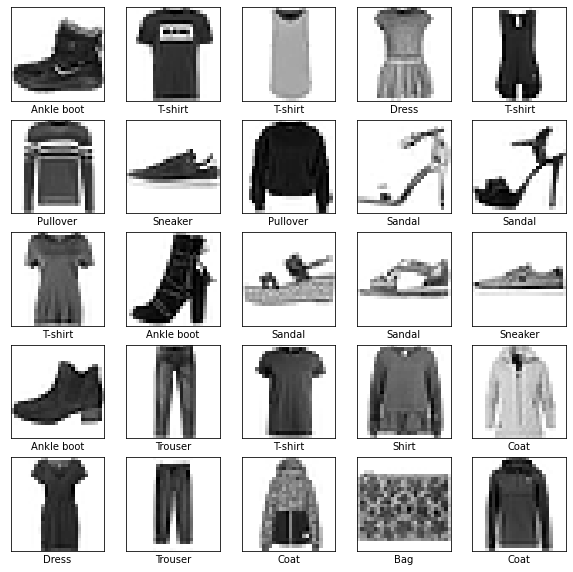

In [81]:
# 데이터 시각화
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in  range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_label[i]])
plt.show()

In [ ]:
# 학습데이터
_train_data = train_data / 255.0
_test_data  = test_data / 255.0
_train_data[0]

In [83]:
# 라벨 원-핫인코딩
_train_label = to_categorical(train_label)
_test_label  = to_categorical(test_label)
_train_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [84]:
# 학습모델 설계
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                50240     
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [85]:
# 학습모댈 설정
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [86]:
# 학습하기
model.fit(_train_data, _train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 42s 2ms/step - loss: 0.5297 - acc: 0.8151
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3889 - acc: 0.8587
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3486 - acc: 0.8728
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3227 - acc: 0.8809
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3085 - acc: 0.8867
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2923 - acc: 0.8924
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - acc: 0.8944
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - acc: 0.8990
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2637 - acc: 0.9020
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2561 - acc: 0.9051


In [87]:
# 모델 평가하기
loss, accuracy = model.evaluate(_test_data, _test_label)
print(loss, accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3407 - acc: 0.8785
0.3407214879989624 0.8784999847412109
